In [35]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
all_date = session.query(Measurement.date).all()
for i in range(len(all_date) - 1):
    if all_date[i] <= all_date[i+1]:
        max_date = all_date[i+1]
    i = i+1
max_date

('2017-08-23')

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print(max_date)

('2017-08-23',)


In [12]:
# Calculate the date one year from the last date in data set.
import datetime as dt
one_yr_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_yr_ago)


2016-08-23


In [13]:
# Perform a query to retrieve the data and precipitation scores
one_yr_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_yr_ago).all()
one_yr_prcp

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_prcp = pd.DataFrame(one_yr_prcp, columns=['Date', 'Precipitation'])
df_prcp.set_index('Date', inplace = True)


In [15]:
# Sort the dataframe by date
df_prcp = df_prcp.sort_values('Date')
df_prcp.head()


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


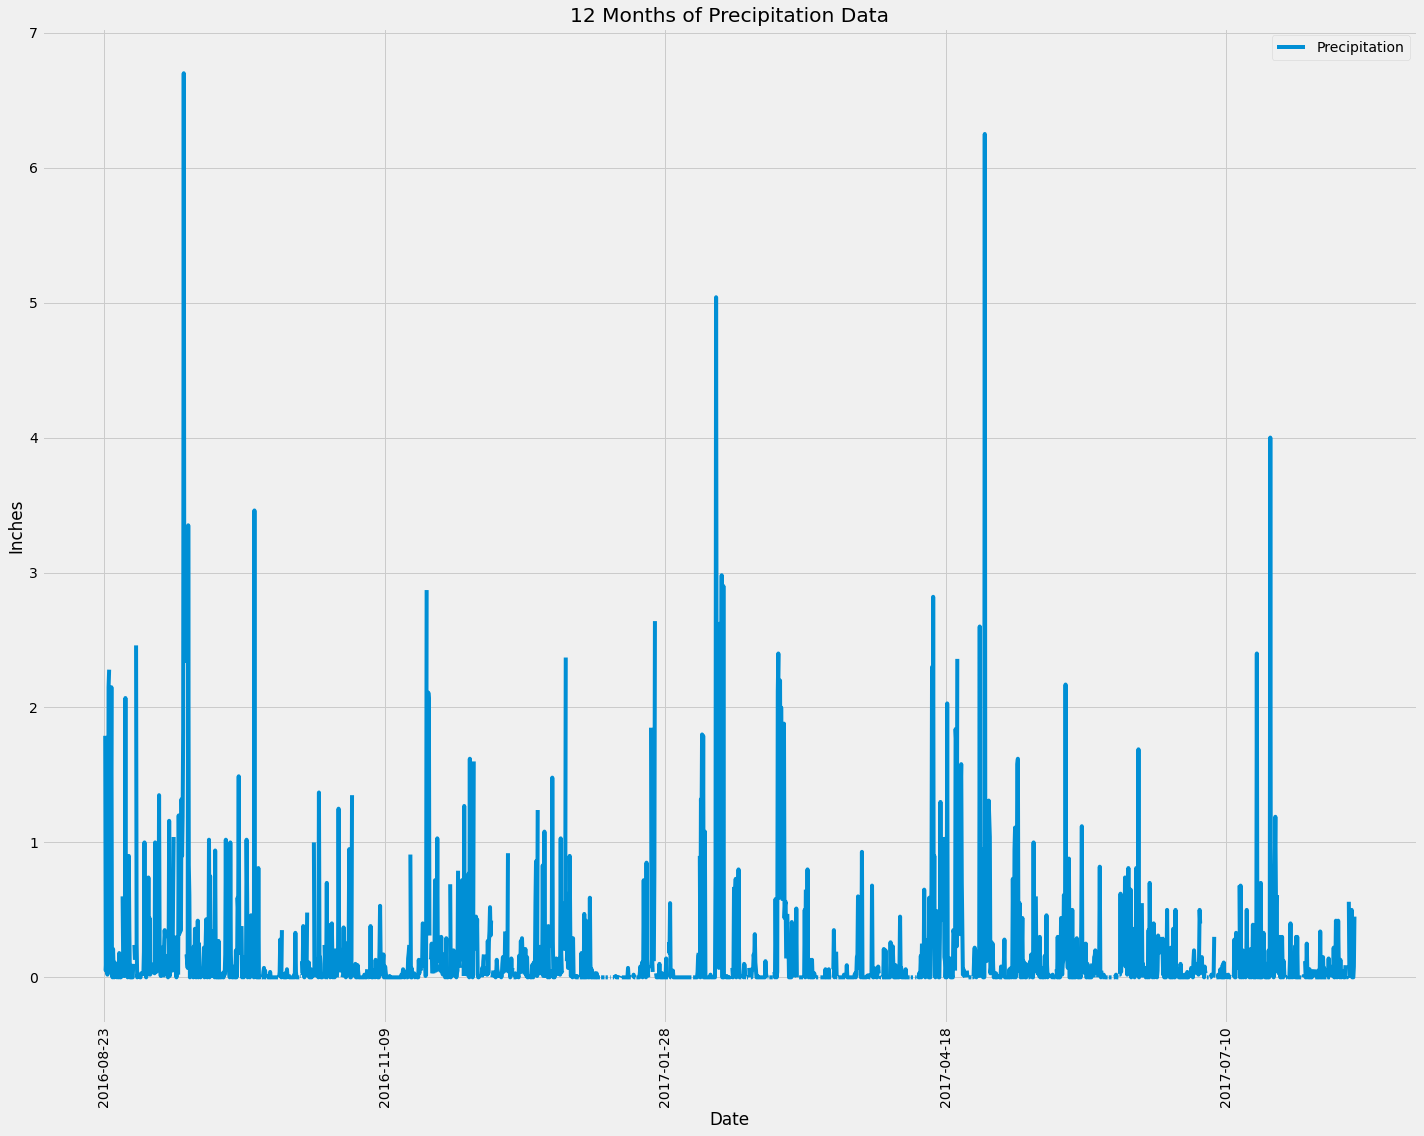

In [38]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (20,16))

plt.title('12 Months of Precipitation Data')
plt.ylabel('Inches') 

df_prcp.plot(ax = ax)
plt.xticks(rotation = 90)
plt.savefig("Img/Precipitation.png", bbox_inches = 'tight')

plt.tight_layout()
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_prcp.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(Station.station))
total_stations.scalar()

9

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Find the most active stations (i.e. what stations have the most rows?)
most_active = station_count[0]
most_active

('USC00519281', 2772)

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_t = session.query(func.min(Measurement.tobs)).\
            filter(Measurement.station == 'USC00519281')
highest_t = session.query(func.max(Measurement.tobs)).\
            filter(Measurement.station == 'USC00519281')
avg_t = session.query(func.avg(Measurement.tobs)).\
            filter(Measurement.station == 'USC00519281')
lt = lowest_t.scalar()
ht = highest_t.scalar()
at = avg_t.scalar()

print(f"The lowest temperature for station USC00519281 is {lt}; \
The highest temperature for station USC00519281 is {ht}; \
            The average temperature for station USC00519281 is {at}.")

The lowest temperature for station USC00519281 is 54.0; The highest temperature for station USC00519281 is 85.0;             The average temperature for station USC00519281 is 71.66378066378067.


In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_yr_tobs = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= one_yr_ago).\
    filter(Measurement.station == 'USC00519281').all()
one_yr_tobs

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [23]:
# Save the query results as a Pandas DataFrame
df_tobs = pd.DataFrame(one_yr_tobs, columns=['Date', 'Temperature'])

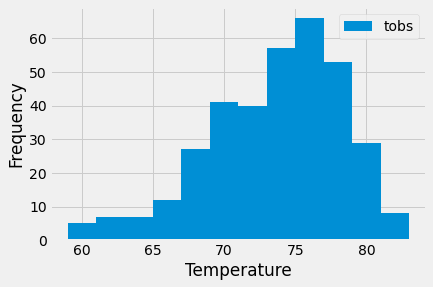

In [24]:
# Plot the results as a histogram
fig, ax = plt.subplots()
label_t = ['tobs']
df_tobs.plot.hist(bins = 12, ax=ax, label = label_t)
plt.xlabel('Temperature')
plt.legend(label_t)

plt.show()

# Close session

In [25]:
# Close Session
session.close()